In [20]:
import PIL
import requests, os
from pathlib import Path

def search_openverse(query, n=20, license_type="commercial"):
    """
    Search Openverse for images.
    license_type can be 'commercial', 'noncommercial', or 'all'
    """
    url = "https://api.openverse.engineering/v1/images/"
    params = {
        "q": query,
        "page_size": n,
        "license_type": license_type,
    }
    r = requests.get(url, params=params)
    r.raise_for_status()
    data = r.json()
    return [res["url"] for res in data["results"]]

def download_images(urls, out_dir, min_size=160, max_size=512):
    import PIL.Image as Image
    import io
    out = Path(out_dir)
    out.mkdir(parents=True, exist_ok=True)

    for i, url in enumerate(urls):
        try:
            resp = requests.get(url, timeout=10)
            img = Image.open(io.BytesIO(resp.content)).convert("RGB")
            if min(img.size) < min_size or max(img.size) > max_size:
                print("skip", url, "size too small or large")
                continue
            img.save(out / f"{i:04d}.jpg", quality=90)
        except Exception as e:
            print("skip", url, e)




In [21]:
urls = search_openverse("red apple", n=15)
print(f"Found {len(urls)} images.")
download_images(urls, "data/red_apple")

Found 15 images.
skip https://live.staticflickr.com/8066/8250633862_ff32af48f7_b.jpg size too small or large
skip https://live.staticflickr.com/7144/6404975957_02a6cc0a40_b.jpg size too small or large
skip https://live.staticflickr.com/45/147883143_bc336d8f38_b.jpg size too small or large
skip https://live.staticflickr.com/4011/4268970128_2088b4809e_b.jpg size too small or large
skip https://live.staticflickr.com/3195/2889603259_3ec9bc2f89_b.jpg size too small or large
skip https://upload.wikimedia.org/wikipedia/commons/1/15/Red_Apple.jpg cannot identify image file <_io.BytesIO object at 0x76f5f24ab240>
skip https://live.staticflickr.com/5125/5219194771_57d74da916_b.jpg size too small or large
skip https://upload.wikimedia.org/wikipedia/commons/0/06/Red_apple.svg cannot identify image file <_io.BytesIO object at 0x76f5f25a5fd0>
skip https://live.staticflickr.com/3134/2889603833_60c528f3cc_b.jpg size too small or large
skip https://live.staticflickr.com/29/89990962_f73570833f_b.jpg size

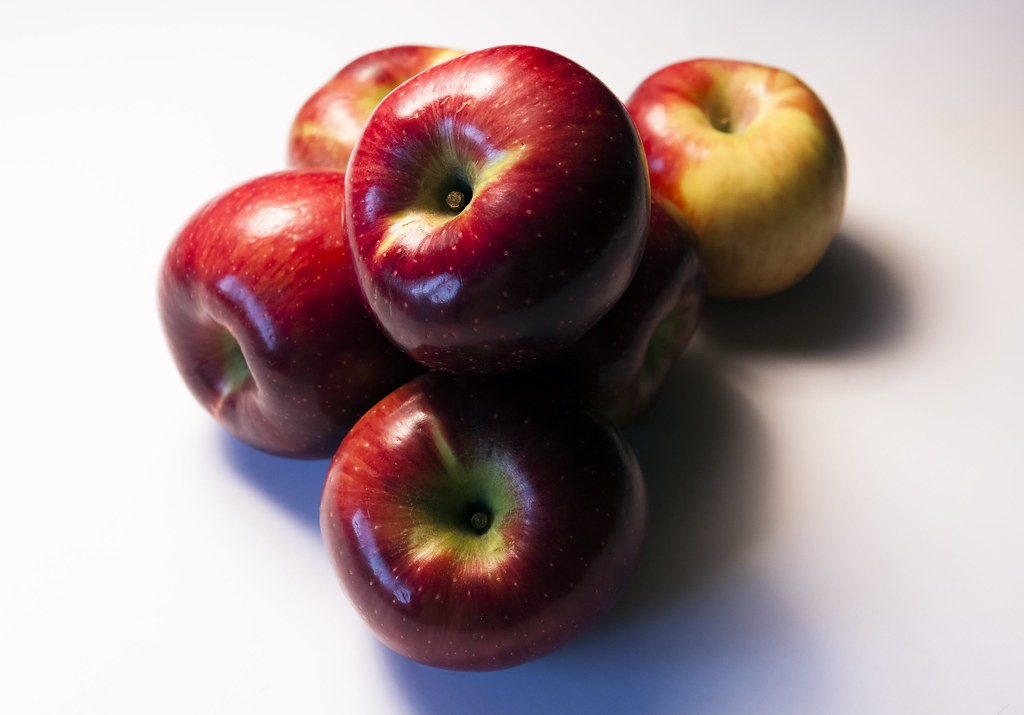

In [15]:
from PIL import Image

Image.open("data/red_apple/0000.jpg")

In [10]:
img = Image.open("data/red_apple/0000.jpg")

In [12]:
img.size[0]

1024